In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataKNN.csv')

In [3]:
df

,CTDTMP [ITS-90],OXYGEN [UMOL/KG],CTDSAL [PSS-78],TCARBN [UMOL/KG],ALKALI [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],CTDPRS [DBAR],NITRAT [UMOL/KG],PH
0,4.547,119.10,34.547339,2286.68,2356.26,2.824,70.516,997.4,37.126,7.552423
1,4.533,100.64,34.497660,2290.58,2348.82,2.744,71.046,998.3,38.908,7.518387
2,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,7.514944
3,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,7.514944
4,4.536,130.80,34.446640,2282.86,2339.48,2.532,62.012,998.7,35.762,7.514944
...,...,...,...,...,...,...,...,...,...,...
277318,3.494,67.60,34.432999,2290.04,2359.24,2.880,120.580,1098.0,41.750,7.565329
277319,2.898,82.60,34.512001,2325.14,2374.28,2.780,129.890,1299.0,40.660,7.508111
277320,2.621,99.60,34.558998,2342.30,2384.66,2.770,133.730,1499.0,40.110,7.487689
277321,2.339,115.70,34.598000,2347.40,2404.94,2.710,136.900,1702.0,39.560,7.536210


In [4]:
corr_matrix = df.corr()

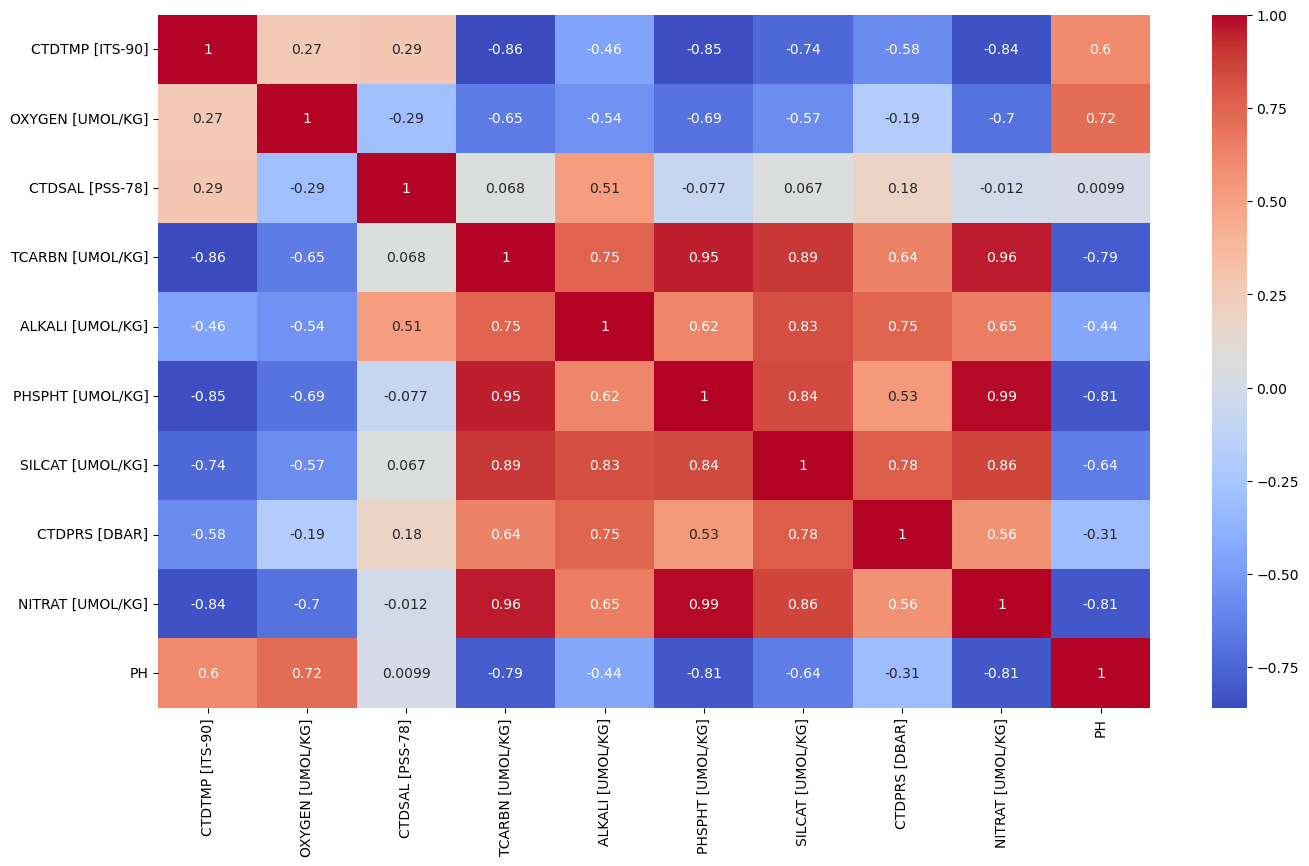

In [5]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(16,9)
plt.show()

In [6]:
df= df.drop(['ALKALI [UMOL/KG]','CTDPRS [DBAR]','CTDSAL [PSS-78]'], axis=1)

In [7]:
df

,CTDTMP [ITS-90],OXYGEN [UMOL/KG],TCARBN [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],NITRAT [UMOL/KG],PH
0,4.547,119.10,2286.68,2.824,70.516,37.126,7.552423
1,4.533,100.64,2290.58,2.744,71.046,38.908,7.518387
2,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
3,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
4,4.536,130.80,2282.86,2.532,62.012,35.762,7.514944
...,...,...,...,...,...,...,...
277318,3.494,67.60,2290.04,2.880,120.580,41.750,7.565329
277319,2.898,82.60,2325.14,2.780,129.890,40.660,7.508111
277320,2.621,99.60,2342.30,2.770,133.730,40.110,7.487689
277321,2.339,115.70,2347.40,2.710,136.900,39.560,7.536210


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X=df.drop('PH', axis=1)

In [11]:
donnees_normalisees = pd.DataFrame(scaler.fit_transform(X), columns=['CTDTMP [ITS-90]','OXYGEN [UMOL/KG','TCARBN [UMOL/KG]','PHSPHT [UMOL/KG]','SILCAT [UMOL/KG]','NITRAT [UMOL/KG]'])

In [12]:
donnees_normalisees

,CTDTMP [ITS-90],OXYGEN [UMOL/KG,TCARBN [UMOL/KG],PHSPHT [UMOL/KG],SILCAT [UMOL/KG],NITRAT [UMOL/KG]
0,-0.437189,-0.505576,0.623404,0.941073,0.020342,0.772220
1,-0.438850,-0.748621,0.651517,0.863155,0.029332,0.889992
2,-0.438494,-0.351533,0.595868,0.656670,-0.123895,0.682074
3,-0.438494,-0.351533,0.595868,0.656670,-0.123895,0.682074
4,-0.438494,-0.351533,0.595868,0.656670,-0.123895,0.682074
...,...,...,...,...,...,...
277318,-0.562119,-1.183627,0.647624,0.995616,0.869482,1.077819
277319,-0.632830,-0.986136,0.900637,0.898218,1.027389,1.005781
277320,-0.665694,-0.762314,1.024333,0.888478,1.092520,0.969432
277321,-0.699151,-0.550341,1.061095,0.830039,1.146286,0.933082


In [13]:
corr_matrix = df.corr()

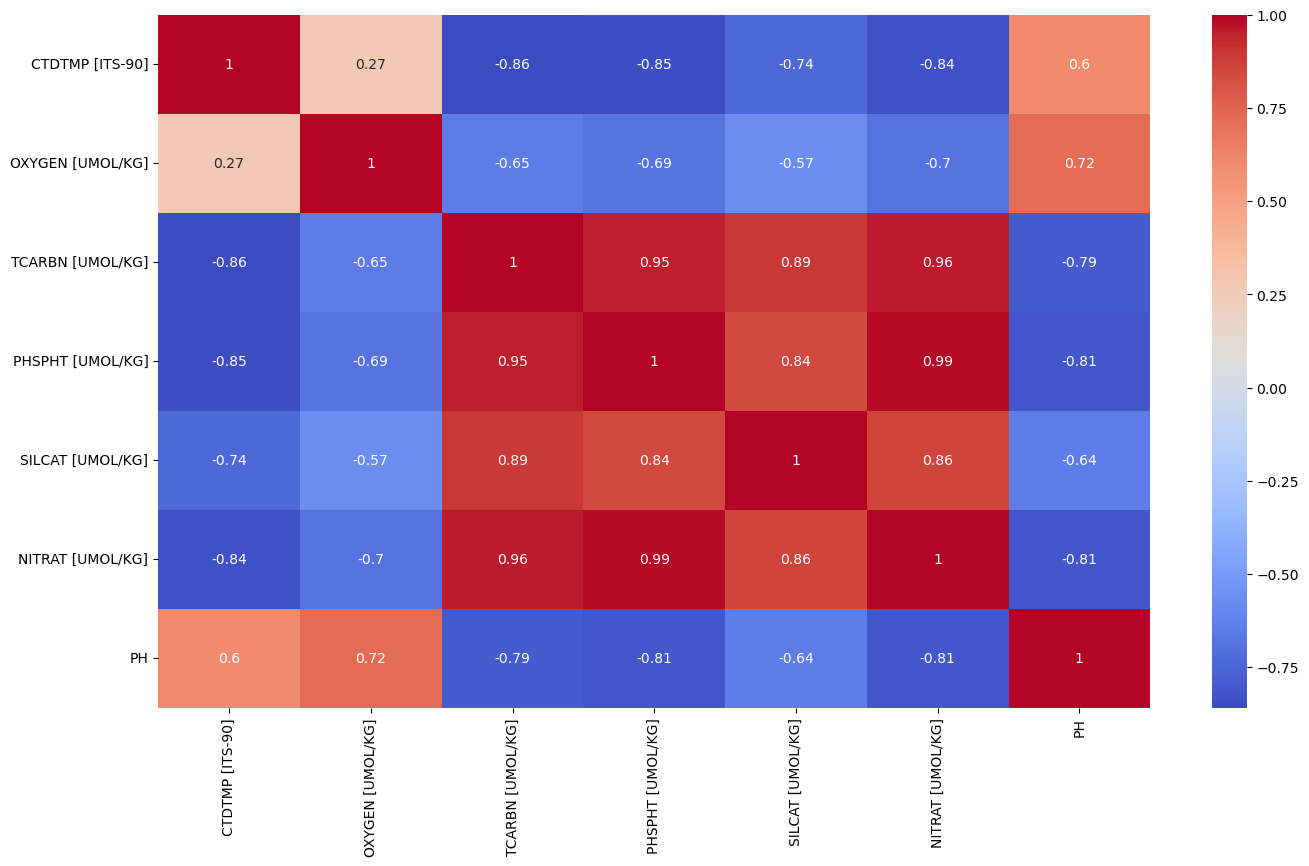

In [14]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
fig=plt.gcf()
fig.set_size_inches(16,9)
plt.show()